In [20]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [21]:
df=pd.read_csv("Play Tennis.csv")
value=['Outlook','Temprature','Humidity','Wind']
df

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [22]:
#machine learning algorithms can only learn from numbers (int, float, doubles .. )
#so let us encode it to int
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                     #encode your data
df=df.apply(string_to_int.fit_transform) #fit and transform it
df

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


In [23]:
#To divide our data into attribute set and Label:
feature_cols = ['Outlook','Temprature','Humidity','Wind']
X = df[feature_cols ]                               #contains the attribute 
y = df.Play_Tennis                                  #contains the label

In [24]:
#To divide our data into training and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [25]:
# perform training 
from sklearn.tree import DecisionTreeClassifier                             # import the classifier
classifier = DecisionTreeClassifier(criterion="entropy", random_state=100)     # create a classifier object
classifier.fit(X_train, y_train)                                              # fit the classifier with X and Y data or 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [26]:
#Predict the response for test dataset
y_pred= classifier.predict(X_test)  

In [27]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p

,Actual,Predicted
1,0,0
8,1,1
9,1,1
6,1,1
3,1,0


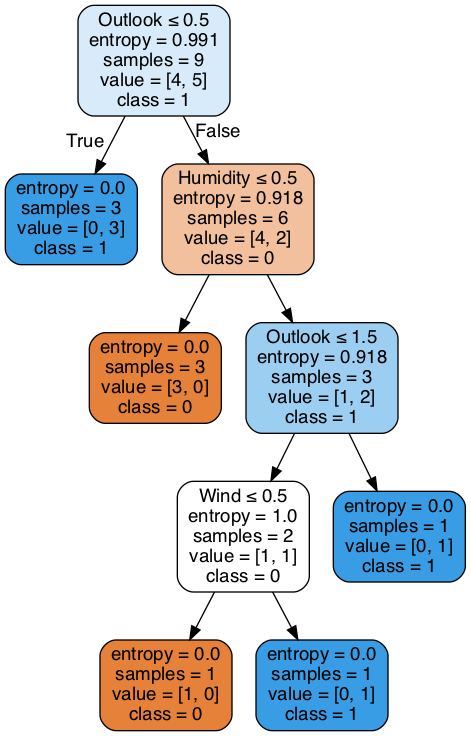

In [28]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =value,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Play Tennis.png')
Image(graph.create_png())